 ## Tutorial REBECCA ##




In [1]:
#Modules
import lightkurve as lk 
%matplotlib inline
import os
import datetime
import rebecca as rb

In [2]:
PATH= datetime.datetime.now().strftime('TESS_%Y%m%dT%H%M%S')
os.makedirs(PATH)

In [4]:
Search_data= lk.search_lightcurve("TOI-3486.01", author= ['SPOC', 'TESS-SPOC']) #Modify as wanted
Search_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 66,2023,SPOC,120,221861843,0.0
1,TESS Sector 66,2023,TESS-SPOC,200,221861843,0.0


In [5]:
#Data from the planet
#Please Change as wanted

T0=2459382.5174 #Transit Midpoint
T0= T0 - 2457000
P= 2.2177820 #Period
binned= 0.005 #Just for this time, the binning should be less than 1 because if a different type of binning
transits= []

Example!!

In [6]:
#Download the data you want

sector_data= Search_data[0].download()
sector_name= 'sector_selected'

In [7]:
#Identify when the transits will happen (Assuming there is no TTV)
#Use this function to calculate the predicted transits

rb.transit_identif(sector_data, T0, P, transits)
print('\n\nNow the information of the transit midpoints (calculated) is in the array! (Save the data, can be helpful if you need to compare with results from models):\n', transits)

Range of time: 3097.6788014938506 - 3124.222996503549

Transit midpoint T0: 2382.5173999997787

T0 adjustes to range: 3096.643203999779

Transit times:  [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]


Now the information of the transit midpoints (calculated) is in the array! (Save the data, can be helpful if you need to compare with results from models):
 [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]


In [8]:
#Do you want to remove outliers?
sector_data= rb.remove_outliers(sector_data)

Obtaining Phase folding...


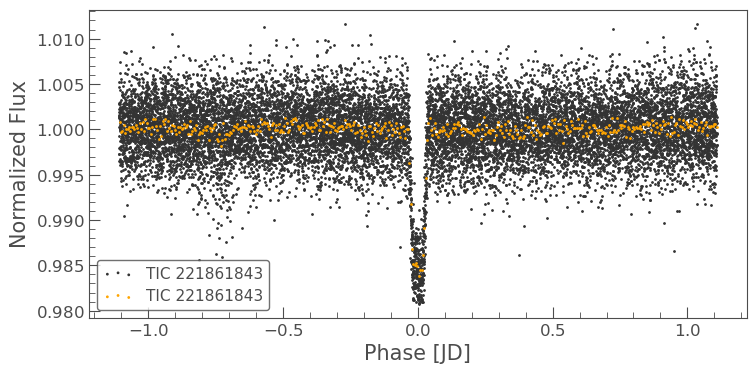

Saving data NORMALIZED...



Data_sector_selected_PF.csv SAVED in  TESS_20250323T022028  folder.
Data_sector_selected_NoPF.csv SAVED in  TESS_20250323T022028  folder.


In [9]:
#Save the data:
#Phase folding data and "Raw" data
#Also, shows phase folding plot binned
#Be careful!! This process take some time


rb.save_data(sector_data, T0, P, PATH, binned, sector_name)

Now you have the phase folding and the raw data of TESS

Now it's time to work with it. You can just call the data as always with astropy, however, REBECCA have the option to call the data using the function 'loading_data'


In [1]:
#Modules you must add
import rebecca as rb

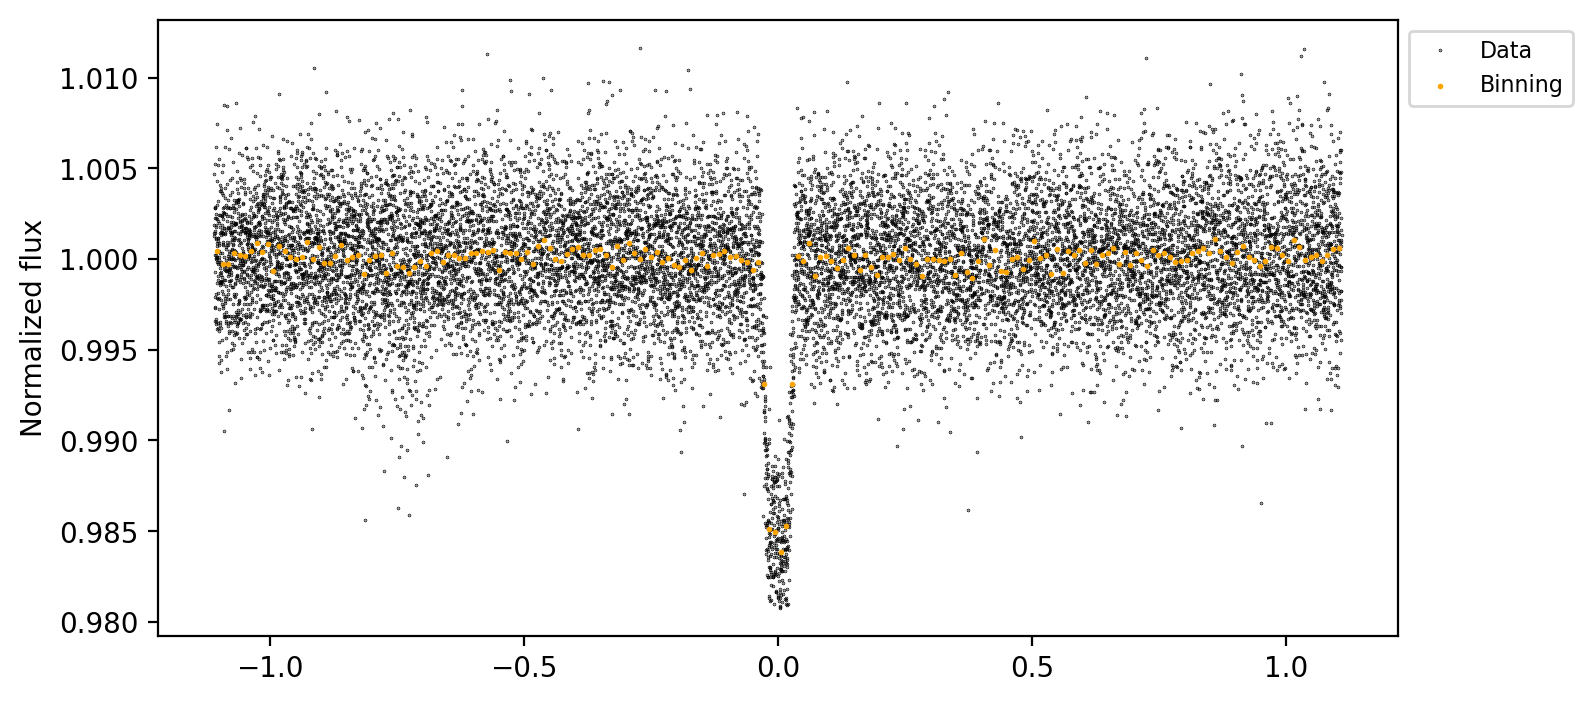

In [3]:
#Working with Phase folded data

PATH= 'TESS_20250323T022028'   #PATH NAME 
sector_name= 'sector_selected'
name= 'Data_' + sector_name + '_PF.csv'
transits=[]
binned= 200
#Sometimes you need other type of flux (pdcsap_flux). Is inside the total_data array, just call it as total_data['pdcsap_flux'] when using it
#For this case, since you don't need the transit midpoints just create an empty array to insert to the function 

data_time, data_flux, data_err_flux= rb.loading_data(PATH, binned ,name, transits)

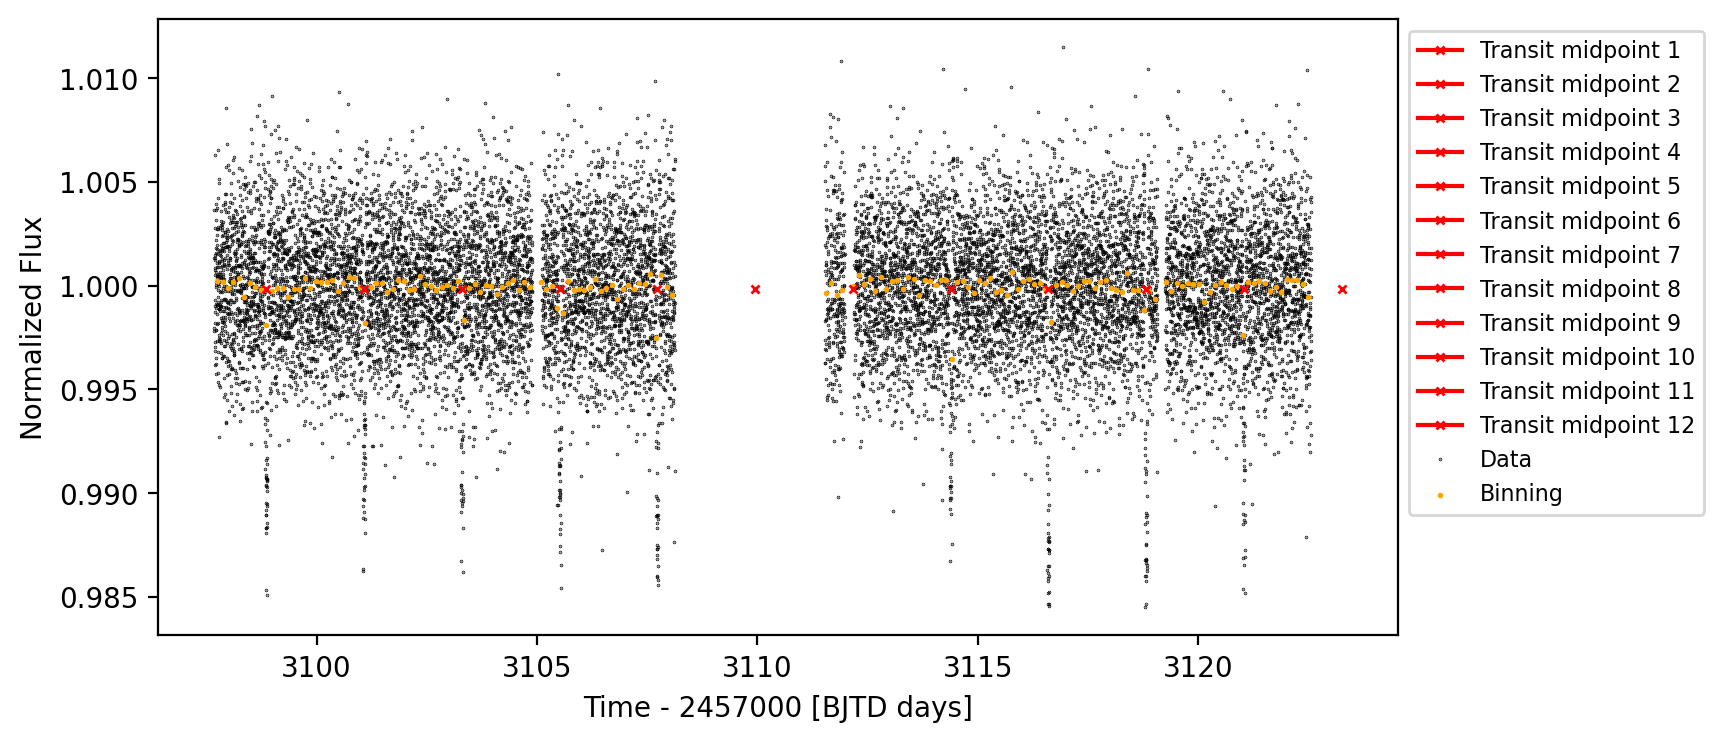

In [4]:
#Working with Raw data

#PATH= 'TESS_20241116T062453'   #PATH NAME 
sector_name= 'sector_selected'
name= 'Data_' + sector_name + '_NoPF.csv' #You can also try the _PF.csv file, just not in this object, is working weird
transits= [3098.860985999779, 3101.078767999779, 3103.296549999779, 3105.514331999779, 3107.732113999779, 3109.949895999779, 3112.167677999779, 3114.385459999779, 3116.603241999779, 3118.821023999779, 3121.038805999779, 3123.256587999779]
binned= 200


data_time, data_flux, data_err_flux= rb.loading_data(PATH, binned, name, transits)

Now that you have saved the data you needed go and apply models to them!!

BUT.... if you want to brag about your lightcurve, or obtain a nice plot to show to people, now there is a GUI function!

In [ ]:
rb.GUI(PATH, name)